# Resume Screening AI - Day 2 EDA

Goal:
    -Explore resume dataset
    -Understand text length,labels,imbalance
    -Prepare for text preprocessing

In [50]:
import pandas as pd
import numpy as numpy
import matplotlib.pyplot as plt

In [51]:
df = pd.read_csv("../data/resume_data.csv")

In [52]:
df.head()

,address,career_objective,skills,educational_institution_name,degree_names,passing_years,educational_results,result_types,major_field_of_studies,professional_company_names,...,online_links,issue_dates,expiry_dates,job_position_name,educationaL_requirements,experiencere_requirement,age_requirement,responsibilities.1,skills_required,matched_score
0,NaN,Big data analytics working and database wareho...,"['Big Data', 'Hadoop', 'Hive', 'Python', 'Mapr...",['The Amity School of Engineering & Technology...,['B.Tech'],['2019'],['N/A'],[None],['Electronics'],['Coca-COla'],...,NaN,NaN,NaN,Senior Software Engineer,B.Sc in Computer Science & Engineering from a ...,At least 1 year,NaN,Technical Support\nTroubleshooting\nCollaborat...,NaN,0.850000
1,NaN,Fresher looking to join as a data analyst and ...,"['Data Analysis', 'Data Analytics', 'Business ...","['Delhi University - Hansraj College', 'Delhi ...","['B.Sc (Maths)', 'M.Sc (Science) (Statistics)']","['2015', '2018']","['N/A', 'N/A']","['N/A', 'N/A']","['Mathematics', 'Statistics']",['BIB Consultancy'],...,NaN,NaN,NaN,Machine Learning (ML) Engineer,M.Sc in Computer Science & Engineering or in a...,At least 5 year(s),NaN,Machine Learning Leadership\nCross-Functional ...,NaN,0.750000
2,NaN,NaN,"['Software Development', 'Machine Learning', '...","['Birla Institute of Technology (BIT), Ranchi']",['B.Tech'],['2018'],['N/A'],['N/A'],['Electronics/Telecommunication'],['Axis Bank Limited'],...,NaN,NaN,NaN,"Executive/ Senior Executive- Trade Marketing, ...",Master of Business Administration (MBA),At least 3 years,NaN,"Trade Marketing Executive\nBrand Visibility, S...",Brand Promotion\nCampaign Management\nField Su...,0.416667
3,NaN,To obtain a position in a fast-paced business ...,"['accounts payables', 'accounts receivables', ...","['Martinez Adult Education, Business Training ...",['Computer Applications Specialist Certificate...,['2008'],[None],[None],['Computer Applications'],"['Company Name ï¼ City , State', 'Company Name...",...,NaN,NaN,NaN,Business Development Executive,Bachelor/Honors,1 to 3 years,Age 22 to 30 years,Apparel Sourcing\nQuality Garment Sourcing\nRe...,Fast typing skill\nIELTSInternet browsing & on...,0.760000
4,NaN,Professional accountant with an outstanding wo...,"['Analytical reasoning', 'Compliance testing k...",['Kent State University'],['Bachelor of Business Administration'],[None],['3.84'],[None],['Accounting'],"['Company Name', 'Company Name', 'Company Name...",...,[None],[None],"['February 15, 2021']",Senior iOS Engineer,Bachelor of Science (BSc) in Computer Science,At least 4 years,NaN,iOS Lifecycle\nRequirement Analysis\nNative Fr...,iOS\niOS App Developer\niOS Application Develo...,0.650000


In [53]:
df.sample(5)

,address,career_objective,skills,educational_institution_name,degree_names,passing_years,educational_results,result_types,major_field_of_studies,professional_company_names,...,online_links,issue_dates,expiry_dates,job_position_name,educationaL_requirements,experiencere_requirement,age_requirement,responsibilities.1,skills_required,matched_score
4430,NaN,A highly disciplined and hard-working individu...,"['Data Analysis', 'Data Visualization', 'Data ...",['Visveswaraiah Technological University (VTU)'],['B.Tech'],['2019'],['N/A'],['N/A'],['N/A'],['Sahara Medica'],...,NaN,NaN,NaN,System Administrator (Operation & Maintenance ...,Bachelor/Honors,4 to 5 years,NaN,Hardware & Network Installation\nTroubleshooti...,Cisco\nLinux\nOperation & Maintenance of Server,0.65
6038,NaN,I am a market research specialist with a grasp...,"['Research Associate', 'Business Analyst', 'Bu...",['Bhavleesh Duggar College'],['B.Tech'],['2020'],['N/A'],['N/A'],['Mechanical'],['Kripa Infotech'],...,['N/A'],['N/A'],['N/A'],Senior Software Engineer,B.Sc in Computer Science & Engineering from a ...,At least 1 year,NaN,Technical Support\nTroubleshooting\nCollaborat...,NaN,0.66
8824,NaN,To obtain a rewarding position in a field wher...,"['Experienced with Microsoft Office - Word, Ex...","['University of Alabama in Huntsville - City ,...","['B.S. Degree', None]","['2020', '2016']","['3.98', None]","['GPA', None]","['Progress', None]","['Company Name', 'Company Name', 'Company Name']",...,NaN,NaN,NaN,Intern (Generative AI Engineering - 2D/3D Imag...,Bachelor of Science (BSc),NaN,Age 20 to 35 years,Generative AI Development\nEvolutionary Comput...,NaN,0.65
1928,NaN,Looking for a job opportunity in which I can i...,"['Python', 'Anaconda', 'NumPy', 'Pandas', 'Mat...",['VIT-AP University'],['B. Tech'],['2021'],['N/A'],['N/A'],['ECE'],['Experts Hub'],...,NaN,NaN,NaN,Executive - VAT,BBA in Accounting and Finance,1 to 3 years,NaN,Mushak Forms Maintenance\nVAT Software & MS Of...,VAT and Tax,0.58
6303,NaN,NaN,"['budgeting', 'CAD', 'construction management'...",['University of Idaho - School of Engineering'],['Bachelor of Science'],['N/A'],['N/A'],['N/A'],['Mechanical Engineering'],"['Company Name', 'Company Name', 'Company Name...",...,NaN,NaN,NaN,Executive - VAT,BBA in Accounting and Finance,1 to 3 years,NaN,Mushak Forms Maintenance\nVAT Software & MS Of...,VAT and Tax,0.64


In [54]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9544 entries, 0 to 9543
Data columns (total 35 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   address                              784 non-null    object 
 1   career_objective                     4740 non-null   object 
 2   skills                               9488 non-null   object 
 3   educational_institution_name         9460 non-null   object 
 4   degree_names                         9460 non-null   object 
 5   passing_years                        9460 non-null   object 
 6   educational_results                  9460 non-null   object 
 7   result_types                         9460 non-null   object 
 8   major_field_of_studies               9460 non-null   object 
 9   professional_company_names           9460 non-null   object 
 10  company_urls                         9460 non-null   object 
 11  start_dates                   

In [55]:
df["address"].value_counts()

address
Sunnyvale, CA                                                                                                     28
Trenton, NJ                                                                                                       28
10 King's College Road, Rm. 3302 Toronto, Ontario, M5S 3G4 Canada                                                 28
City, State Zip Code                                                                                              28
139 Alder Drive, Mississaugua, Ontario, L5N 6P1                                                                   28
Portland, OR                                                                                                      28
Cambridge, MA                                                                                                     28
Greer, SC                                                                                                         28
1234 Thundar Lane S, Fargo, ND 58102                    

In [56]:
df["address"].value_counts().sum()

np.int64(784)

In [57]:
df["career_objective"].value_counts()

career_objective
Big data analytics working and database warehouse manager with robust experience in handling all kinds of data. I have also used multiple cloud infrastructure services and am well acquainted with them. Currently in search of role that offers more of development.                                                                                                                                                                                                                                                         28
Fresher looking to join as a data analyst and junior data scientist. Experienced in creating meaningful data dashboards and evaluation models.                                                                                                                                                                                                                                                                                                                                       

In [58]:
df["career_objective"].value_counts().sum()

np.int64(4740)

In [59]:
df["skills"].value_counts()

skills
[]                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                         56
['Python', 'MySQL', 'Tensorflow', 'Keras', 'Machine Learning', 'Deep Learning']                                                                                                                                                                                                                                                                                                                                                                    

In [60]:
df["skills"].value_counts().sum()

np.int64(9488)

In [61]:
df["educational_institution_name"].value_counts()

educational_institution_name
['Illinois Institute of Technology', 'National Institute of Technology']                                                                                            112
['Nagpur University']                                                                                                                                                84
['Southeastern Louisiana University']                                                                                                                                56
['VIT-AP University']                                                                                                                                                56
['Amity University, Noida']                                                                                                                                          56
                                                                                                                                   

In [62]:
df["degree_names"].value_counts()

degree_names
['B.Tech']                                                                      1764
['Bachelor of Science']                                                          980
['B.Tech', 'M.Tech']                                                             308
['Master of Science', 'Bachelor of Science']                                     168
['B.S.']                                                                         168
                                                                                ... 
['Bachelor of Science', 'N/A']                                                    28
['Certified Professional Coach', 'Bachelor of Science']                           20
['Masters of Business Administration', 'Bachelors of Science', 'N/A']             12
['ACCA II Part Qualified', 'Diploma', 'Grade 12 (School Certificate)', None]       6
['Master of Science Degree', 'Bachelor of Science']                                4
Name: count, Length: 180, dtype: int64

In [63]:
df["passing_years"].value_counts()

passing_years
['2019']                            1428
['2020']                            1064
['2017', '2019']                     448
['2018']                             420
['N/A']                              420
                                    ... 
['2007', '2004']                      28
['2010', '1991']                      20
['2013', '2011', 'N/A']               12
['2008', '2001', '1995', '1990']       6
['May 2012', 'December 2006']          4
Name: count, Length: 149, dtype: int64

In [64]:
df["educational_results"].value_counts()

educational_results
['N/A']                             3612
['N/A', 'N/A']                      1656
[None]                               728
[None, None]                         692
['N/A', 'N/A', 'N/A']                292
                                    ... 
["Dean's list 3 quarters", None]      28
['3.82']                              28
['3.67', '3.66']                      28
['4.00', 'N/A']                       28
['3.95']                              10
Name: count, Length: 78, dtype: int64

In [65]:
df["result_types"].value_counts()

result_types
['N/A']                                                                                           3416
['N/A', 'N/A']                                                                                    1572
[None]                                                                                            1064
[None, None]                                                                                       944
['GPA']                                                                                            682
[None, None, None]                                                                                 308
['N/A', 'N/A', 'N/A']                                                                              292
['GPA', 'GPA']                                                                                     280
['N/A', 'N/A', 'N/A', 'N/A']                                                                       112
['GPA', None]                                               

In [66]:
df["major_field_of_studies"].value_counts()

major_field_of_studies
['N/A']                                                                 616
['Computer Science']                                                    560
['Computers']                                                           448
['Accounting']                                                          280
['ECE']                                                                 168
                                                                       ... 
['Coaching', 'Business Administration, Marketing']                       20
['Business Strategy', 'Business Management', 'Biology/Pre-Medicine']     12
['Administrative Assistance']                                            10
[None, 'Accountancy', None, None]                                         6
['Psychology', 'Integrated Marketing Communications']                     4
Name: count, Length: 210, dtype: int64

In [67]:
df["professional_company_names"].value_counts()

professional_company_names
['Company Name', 'Company Name', 'Company Name']                                                                    1204
['Company Name', 'Company Name', 'Company Name', 'Company Name']                                                    1130
['Company Name', 'Company Name', 'Company Name', 'Company Name', 'Company Name']                                     476
['Company Name', 'Company Name', 'Company Name', 'Company Name', 'Company Name', 'Company Name']                     384
['Company Name', 'Company Name', 'Company Name', 'Company Name', 'Company Name', 'Company Name', 'Company Name']     284
                                                                                                                    ... 
['VW TECHNOLOGY']                                                                                                     28
['SGN Pvt LTD']                                                                                                       28
['HiB

In [68]:
df["company_urls"].value_counts()

company_urls
['N/A']                                                                                                                                                                                                                                                                                  2436
[None, None, None]                                                                                                                                                                                                                                                                       1434
[None, None, None, None]                                                                                                                                                                                                                                                                 1326
[None]                                                                                                                           

In [69]:
df["start_dates"].value_counts()

start_dates
['Nov 2019']                                                                                           280
['Jan 2019']                                                                                           280
['Apr 2019']                                                                                           280
['May 2019']                                                                                           252
['Feb 2020']                                                                                           196
                                                                                                      ... 
['03/2014', '06/2003', '01/2002', '01/2001', '01/1995', '01/1991']                                      20
['06/2014', '06/2014', '07/2014', '08/2011', '06/2009', '12/2007', '01/2004', '03/1999', '04/1996']     12
['Jul 1996', 'Nov 1995', 'Oct 1993', 'Jan 1990']                                                        10
['09/2005', '01/2004', '0

In [70]:
df["end_dates"].value_counts()

end_dates
['Till Date']                                                                                          700
['Ongoing']                                                                                            588
['till date']                                                                                          336
['Oct 2020']                                                                                           280
['Dec 2020']                                                                                           168
                                                                                                      ... 
['10/2019', '11/2013', '01/2003', '01/2002', '01/2000', '01/1995']                                      20
['Current', 'Current', 'Current', '06/2014', '08/2011', '08/2009', '11/2007', '02/2004', '03/1999']     12
['Jul 2016', 'Jul 1996', 'Nov 1995', 'Oct 1992']                                                        10
['Current', '05/2005', '12/

In [71]:
df["related_skils_in_job"].value_counts()

related_skils_in_job
[None]                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                        280
[None, None, None]                                                                                                                                                                                                                                                                                                                                               

In [72]:
df["positions"].value_counts()

positions
['Intern']                                                                                                                                                                                                                                                                             392
['Intern Trainee']                                                                                                                                                                                                                                                                     140
['Data Analyst']                                                                                                                                                                                                                                                                       112
['Software Engineering Manager', 'Software Engineering Manager', 'Principal Software Engineer', 'Software Engineer']                         

In [73]:
df["locations"].value_counts()

locations
['N/A']                                                                                                                                    3164
['City, State', 'City, State', 'City, State']                                                                                               700
['City, State', 'City, State', 'City, State', 'City, State']                                                                                598
['N/A', 'N/A']                                                                                                                              532
['City, State', 'City, State', 'City, State', 'City, State', 'City, State']                                                                 336
                                                                                                                                           ... 
['Malvern, PA', 'Pittsburgh, PA', 'Pittsburgh, PA']                                                                           

In [74]:
df["responsibilities"].value_counts()

responsibilities
Project Design\nData Analysis\nACCORD/Alliance Knowledge\nBNBC Standards\nCost Estimation\nFeasibility Studies\nDocumentation\nCompliance\nSite Monitoring\nPolicy Enforcement\nLegal Compliance\nData Management\nTeam Collaboration                                                                                                                                                                                                                                                                                                                                                                                             342
Supervision\nMonitoring\nConstruction\nEstimation\nPlanning\nMaterial Management\nProject Coordination\nQuality Assurance\nCost Control\nInventory\nOperations\nSafety\nError Escalation\nMiscellaneous Tasks\n\n\n\n\n                                                                                                                                                          

In [76]:
df[["online_links","issue_dates","expiry_dates","job_position_name","educationaL_requirements","experiencere_requirement"]].isnull().sum()

online_links                7536
issue_dates                 7536
expiry_dates                7536
job_position_name              0
educationaL_requirements       0
experiencere_requirement    1364
dtype: int64

In [77]:
df["job_position_name"].value_counts()

job_position_name
Project Coordinator (Civil)                                                                342
Site Engineer                                                                              342
Civil Engineer                                                                             342
HR Officer                                                                                 342
Database Administrator (DBA)                                                               341
AI Engineer                                                                                341
Mechanical Designer                                                                        341
Mechanical Engineer                                                                        341
System Administrator (Operation & Maintenance of Server, Storage & Service Desk System)    341
Senior Software Engineer                                                                   341
Business Development Executive  

In [78]:
df["educationaL_requirements"].value_counts()

educationaL_requirements
Bachelor/Honors                                                                                                                     2044
Bachelor of Science (BSc) in Computer Science                                                                                        681
Bachelor of Science (BSc) in Computer Science & Engineering                                                                          680
Bachelor of Science (BSc)                                                                                                            680
B.Sc in Civil Engineering from a reputed university.                                                                                 342
Bachelor of Science (BSc) in Civil Engineering                                                                                       342
•Bachelor of Business Administration (BBA) in Human Resource Management\n•BBA/MBA in HRM/Management from any reputed university.     342
•Bachelor of Bus

In [79]:
df["responsibilities.1"].value_counts()

responsibilities.1
Project Design\nData Analysis\nACCORD/Alliance Knowledge\nBNBC Standards\nCost Estimation\nFeasibility Studies\nDocumentation\nCompliance\nSite Monitoring\nPolicy Enforcement\nLegal Compliance\nData Management\nTeam Collaboration                                                                                                                                                                                                                                                                                                                                                                                             342
Supervision\nMonitoring\nConstruction\nEstimation\nPlanning\nMaterial Management\nProject Coordination\nQuality Assurance\nCost Control\nInventory\nOperations\nSafety\nError Escalation\nMiscellaneous Tasks\n\n\n\n\n                                                                                                                                                        

In [80]:
df["skills_required"].value_counts()

skills_required
AutoCAD\nCommunication and negotiation skills\nInternet\nMS Office                                                                                                             342
Human Resource Management                                                                                                                                                      342
Auto CAD 2D 3D\nCivil 3D\nCivil Construction\nCivil Engineering                                                                                                                342
AutoCAD\nETABS\nMicrosoft Office Suite\nMS Project                                                                                                                             342
Brand Promotion\nCampaign Management\nField Supervision\nMerchandising\npromotional activities\nTrade Marketing                                                                341
Fast typing skill\nIELTSInternet browsing & online work ability.                         

In [81]:
df["matched_score"].value_counts()

matched_score
0.850000    1470
0.650000    1321
0.716667     516
0.683333     483
0.750000     452
            ... 
0.230000       1
0.420000       1
0.874667       1
0.733333       1
0.050000       1
Name: count, Length: 345, dtype: int64

In [82]:
df.isnull().sum()

address                                8760
career_objective                       4804
skills                                   56
educational_institution_name             84
degree_names                             84
passing_years                            84
educational_results                      84
result_types                             84
major_field_of_studies                   84
professional_company_names               84
company_urls                             84
start_dates                              84
end_dates                                84
related_skils_in_job                     84
positions                                84
locations                                84
responsibilities                          0
extra_curricular_activity_types        6118
extra_curricular_organization_names    6118
extra_curricular_organization_links    6118
role_positions                         6118
languages                              8844
proficiency_levels              

In [83]:
df[["online_links","issue_dates","expiry_dates","job_position_name","educationaL_requirements","experiencere_requirement"]].isnull().sum()

online_links                7536
issue_dates                 7536
expiry_dates                7536
job_position_name              0
educationaL_requirements       0
experiencere_requirement    1364
dtype: int64

In [87]:
df["text_length"] = df["career_objective"].apply(lambda x: len(str(x).split()))

In [92]:
df["text_length"].describe()

count    9544.000000
mean       17.176655
std        21.628667
min         1.000000
25%         1.000000
50%         1.000000
75%        31.000000
max       201.000000
Name: text_length, dtype: float64

<Axes: >

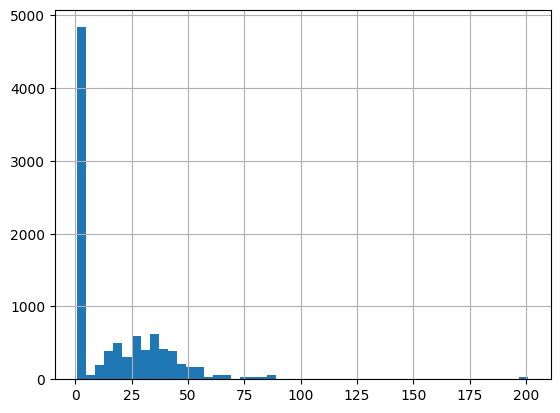

In [93]:
df["text_length"].hist(bins=50)
